<a href="https://colab.research.google.com/github/dzhamalovas/ML/blob/main/ML3_6_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Наивный байесовский классификатор


## Подготовка


In [ ]:
from sklearn import datasets
import pandas as pd

In [ ]:
data = datasets.load_breast_cancer()

In [ ]:
X = data.data[:,:2]
y = data.target

In [ ]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

,count
target,
1,357
0,212


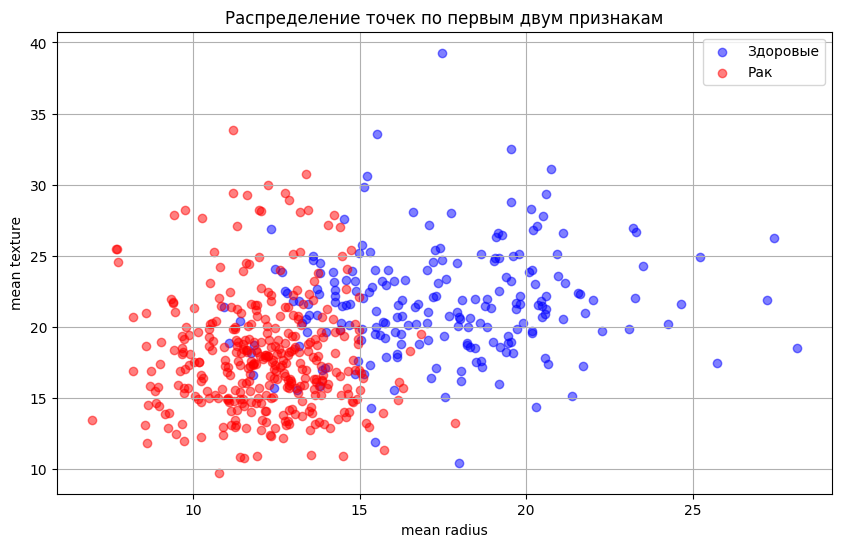

In [ ]:
import matplotlib.pyplot as plt

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(df[df['target'] == 0].iloc[:, 0], df[df['target'] == 0].iloc[:, 1],
            label='Здоровые', color='blue', alpha=0.5)
plt.scatter(df[df['target'] == 1].iloc[:, 0], df[df['target'] == 1].iloc[:, 1],
            label='Рак', color='red', alpha=0.5)
plt.title('Распределение точек по первым двум признакам')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.grid()
plt.show()


## Формула Байеса

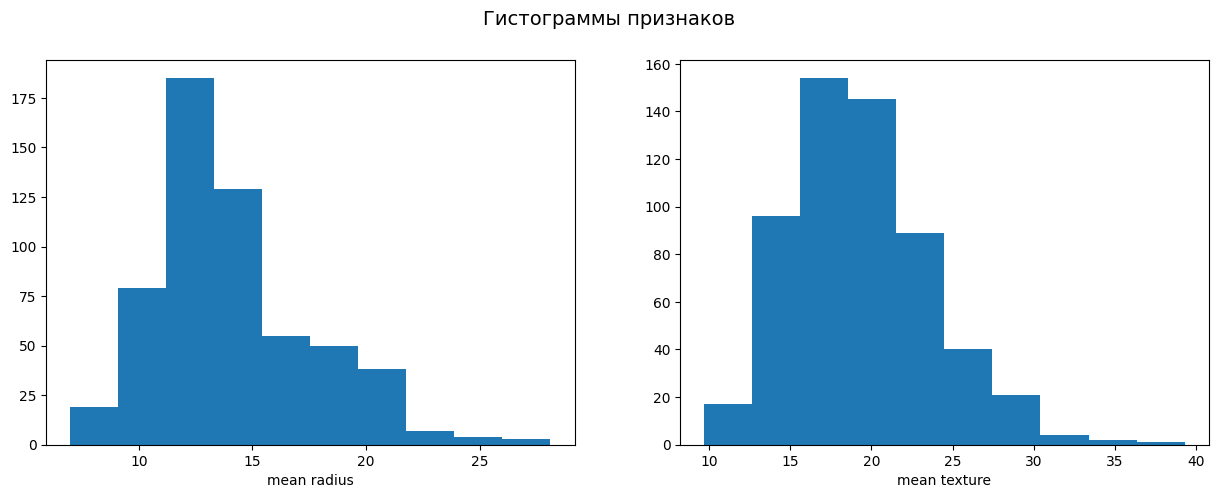

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Инициализируем модель
gaussian_nb = GaussianNB()

# Обучаем модель на первых двух признаках
gaussian_nb.fit(X, y)

# Предсказание на обучающей выборке
y_pred = gaussian_nb.predict(X)

# Вывод метрик
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))


[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.912751677852349


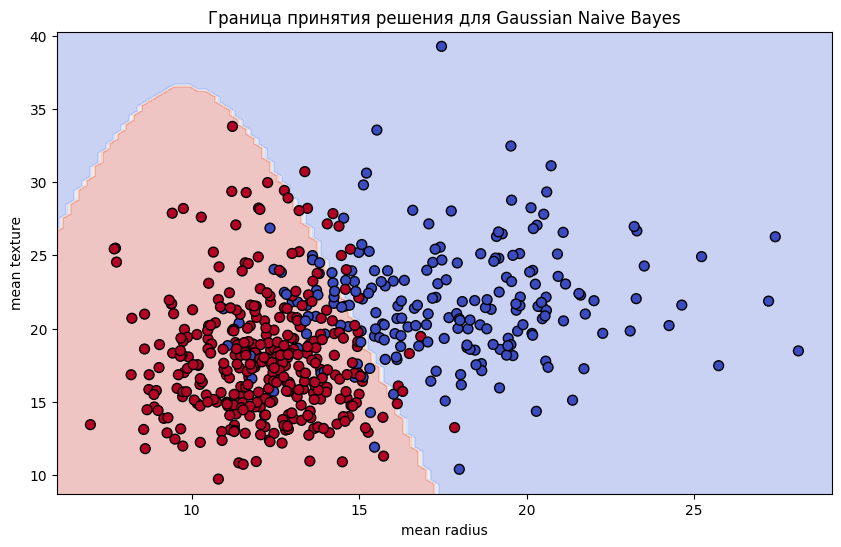

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

data = datasets.load_breast_cancer()
X = data.data[:, :2]
y = data.target

gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = gaussian_nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # Границы решений
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)  # Объекты данных
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Граница принятия решения для Gaussian Naive Bayes')
plt.show()


In [ ]:
# Извлечение всех признаков
X = data.data
y = data.target
X.shape, y.shape

# Обучение модели на всех данных
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)

# Вывод метрик
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))


[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


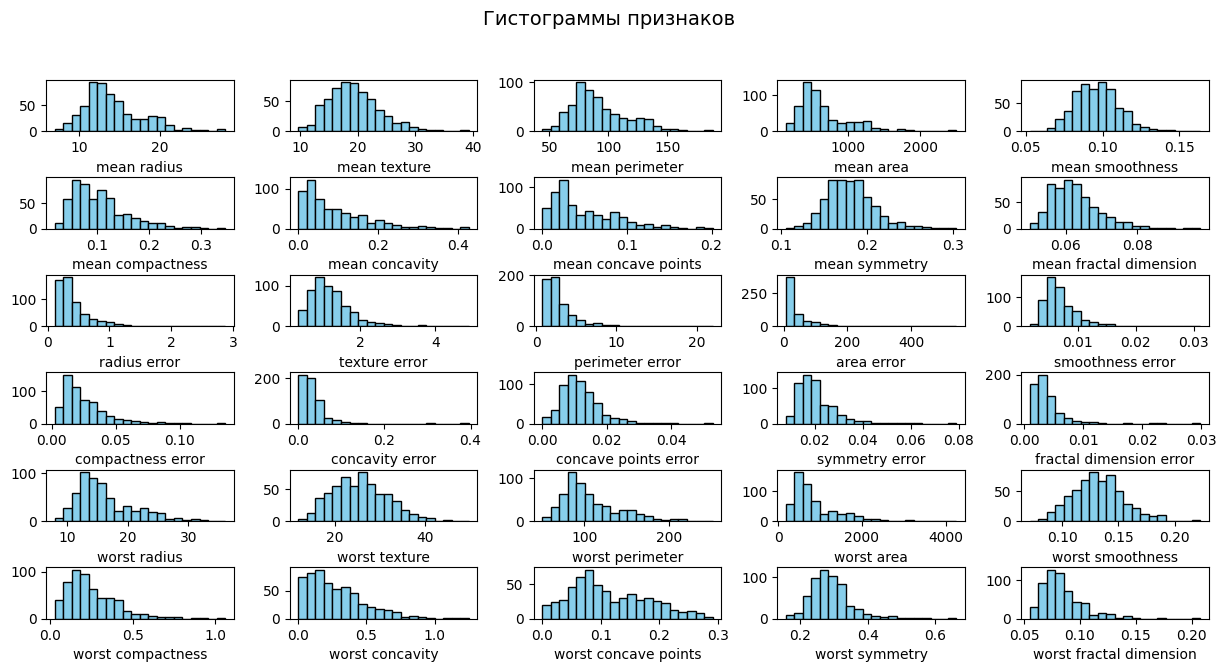

In [ ]:
# Построение гистограмм для всех признаков
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.hist(X[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9, wspace=0.3)
plt.suptitle('Гистограммы признаков', fontsize=14)
plt.show()


In [ ]:
# Создание DataFrame для анализа
df = pd.DataFrame(X, columns=data.feature_names)

# Удаление признаков с ненормальным распределением
df = df.drop(['mean concavity', 'radius error',
               'perimeter error', 'area error',
               'compactness error', 'concavity error',
               'fractal dimension error', 'worst area',
               'worst concavity'],
              axis=1)

# Обучение модели на оставшихся данных
X_reduced = df.values
gaussian_nb.fit(X_reduced, y)
y_pred_reduced = gaussian_nb.predict(X_reduced)

# Вывод метрик для урезанной модели
print(confusion_matrix(y, y_pred_reduced))
print('Accuracy= ', accuracy_score(y, y_pred_reduced))
print('F1_score= ', f1_score(y, y_pred_reduced))


[[196  16]
 [ 15 342]]
Accuracy=  0.945518453427065
F1_score=  0.9566433566433566


# Задания для самостоятельного выполнения


## 1. На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.


In [ ]:
# Мультиномный Наивный Байес
from sklearn.naive_bayes import MultinomialNB

# Для мультиномного Наивного Байеса данные должны быть неотрицательными
X_multinomial = np.abs(X)  # преобразование данных, если они отрицательные
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_multinomial, y)
y_pred_multinomial = multinomial_nb.predict(X_multinomial)

print(confusion_matrix(y, y_pred_multinomial))
print('Accuracy= ', accuracy_score(y, y_pred_multinomial))
print('F1_score= ', f1_score(y, y_pred_multinomial))


[[ 36 176]
 [  7 350]]
Accuracy=  0.6783831282952548
F1_score=  0.7927519818799547


In [ ]:
# Бернулли Наивный Байес
from sklearn.naive_bayes import BernoulliNB

# Преобразование данных в бинарные
X_bernoulli = (X > 0).astype(int)
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_bernoulli, y)
y_pred_bernoulli = bernoulli_nb.predict(X_bernoulli)

print(confusion_matrix(y, y_pred_bernoulli))
print('Accuracy= ', accuracy_score(y, y_pred_bernoulli))
print('F1_score= ', f1_score(y, y_pred_bernoulli))


[[  0 212]
 [  0 357]]
Accuracy=  0.6274165202108963
F1_score=  0.7710583153347732


In [ ]:
# Категориальный Наивный Байес
from sklearn.naive_bayes import CategoricalNB

# Дискретизация признаков
X_categorical = pd.cut(X.flatten(), bins=10, labels=False).reshape(X.shape)
categorical_nb = CategoricalNB()
categorical_nb.fit(X_categorical, y)
y_pred_categorical = categorical_nb.predict(X_categorical)

print(confusion_matrix(y, y_pred_categorical))
print('Accuracy= ', accuracy_score(y, y_pred_categorical))
print('F1_score= ', f1_score(y, y_pred_categorical))


[[169  43]
 [ 19 338]]
Accuracy=  0.8910369068541301
F1_score=  0.9159891598915989


In [ ]:
# Комплементарный Наивный Байес
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB()
complement_nb.fit(X, y)
y_pred_complement = complement_nb.predict(X)

print(confusion_matrix(y, y_pred_complement))
print('Accuracy= ', accuracy_score(y, y_pred_complement))
print('F1_score= ', f1_score(y, y_pred_complement))


[[134  78]
 [136 221]]
Accuracy=  0.6239015817223199
F1_score=  0.6737804878048781


Мультиномный: хорош для дискретных данных, но не подходит для непрерывных.
Бернулли: подходит для бинарных данных, нужно преобразовать данные в бинарный формат.
Категориальный: хорош для работы с категориальными переменными, но требует дискретизации.
Комплементарный: подходит для несбалансированных классов, часто показывает хорошую производительность.

## 2. Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

titanic_data = pd.read_csv('titanic.csv')  # Убедитесь, что файл находится в том же каталоге

titanic_data.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [ ]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
if 'Sex' in titanic_data.columns and 'Embarked' in titanic_data.columns:
    titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)
else:
    print("One or both categorical columns ('Sex', 'Embarked') are not found in the DataFrame.")

titanic_data.fillna(titanic_data.mean(numeric_only=True), inplace=True)

X_titanic = titanic_data.drop(['Survived'], axis=1)
y_titanic = titanic_data['Survived']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

y_pred = gaussian_nb.predict(X_test)

# Вывод метрик
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))


One or both categorical columns ('Sex', 'Embarked') are not found in the DataFrame.
Confusion Matrix:
 [[81 24]
 [17 57]]
Accuracy: 0.770949720670391
F1 Score: 0.7354838709677419


## 3. Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.


In [ ]:
import pandas as pd

titanic_kaggle_data = pd.read_csv('tested.csv')
titanic_kaggle_data.head()

titanic_kaggle_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

titanic_kaggle_data = pd.get_dummies(titanic_kaggle_data, columns=['Sex', 'Embarked'], drop_first=True)

num_cols = titanic_kaggle_data.select_dtypes(include=['float64', 'int64']).columns
titanic_kaggle_data[num_cols] = titanic_kaggle_data[num_cols].fillna(titanic_kaggle_data[num_cols].mean())

cat_cols = titanic_kaggle_data.select_dtypes(include=['object']).columns
for col in cat_cols:
    if col in titanic_kaggle_data.columns:  # Проверяем, существует ли столбец
        titanic_kaggle_data[col].fillna(titanic_kaggle_data[col].mode()[0], inplace=True)

X_kaggle = titanic_kaggle_data.drop(['Survived'], axis=1)
y_kaggle = titanic_kaggle_data['Survived']

print("Размерности X:", X_kaggle.shape)
print("Размерности y:", y_kaggle.shape)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_kaggle, y_kaggle)
y_pred_kaggle_gaussian = gaussian_nb.predict(X_kaggle)

# Вывод метрик для модели
print('Gaussian Naive Bayes (Kaggle):')
print(confusion_matrix(y_kaggle, y_pred_kaggle_gaussian))
print('Accuracy= ', accuracy_score(y_kaggle, y_pred_kaggle_gaussian))
print('F1_score= ', f1_score(y_kaggle, y_pred_kaggle_gaussian))


Размерности X: (418, 9)
Размерности y: (418,)
Gaussian Naive Bayes (Kaggle):
[[266   0]
 [  0 152]]
Accuracy=  1.0
F1_score=  1.0


# Контрольные вопросы по наивному байесовскому классификатору

## 1. Какие условия должны выполняться в данных, чтобы можно было применять наивную байесовскую модель?
Для применения наивной байесовской модели необходимо, чтобы:
- Признаки были независимыми друг от друга. Наивный байес подразумевает, что наличие (или отсутствие) одного признака не влияет на другие.
- Признаки могли быть непрерывными или категориальными. Модели наивного байеса имеют различные вариации, которые могут обрабатывать разные типы данных (например, гауссовский для непрерывных, бернуллиевский и мультиномный для категориальных).
- Целевая переменная должна быть категориальной (например, классы "выжил" и "не выжил" в случае с набором данных о Титанике).

## 2. Какие виды непрерывных распределений существуют и наиболее распространены?
Наиболее распространенные виды непрерывных распределений включают:
- **Нормальное (гауссовское)** распределение: симметричное распределение, описывающее многие естественные явления.
- **Экспоненциальное** распределение: описывает время между событиями в процессе с постоянной интенсивностью.
- **Равномерное** распределение: все значения в заданном интервале имеют одинаковую вероятность.
- **Логнормальное** распределение: используется для моделирования положительных данных, которые имеют асимметричное распределение.

## 3. Как определить вид распределения численной переменной в датасете?
Определить вид распределения численной переменной можно с помощью:
- **Визуализации**: построение гистограмм, ящиков с усами (boxplots) или графиков плотности (density plots) для визуального анализа.
- **Статистических тестов**: такие как тест Шапиро-Уилка, тест Д'Агостино или тест Андерсона-Дарлинга, которые помогают проверить гипотезу о нормальности данных.
- **Анализа описательной статистики**: такие как среднее, медиана, стандартное отклонение и коэффициенты асимметрии и эксцесса.

## 4. Как наивная байесовская модель работает с категориальными признаками?
Наивная байесовская модель может работать с категориальными признаками с помощью:
- **One-Hot Encoding**: преобразование категориальных переменных в бинарные (0 или 1) переменные.
- **Преобразования в частоты**: для мультиномного наивного байеса, где используются частоты категорий для расчета вероятностей.
- **Применения моделей**: таких как Бернулли или Мультиномный наивный Байес, которые непосредственно подходят для работы с категориальными данными.

## 5. Зачем при применении наивного байесовского классификатора может понадобиться анализировать форму эмпирического распределения признаков?
Анализ формы эмпирического распределения признаков важен для:
- Определения, какое распределение использовать (например, нормальное для гауссовского наивного Байеса).
- Оценки применимости модели: если данные не соответствуют предполагаемому распределению, это может негативно сказаться на точности классификации.
- Удаления выбросов и аномальных значений, которые могут исказить результаты.

## 6. В чем особенность модели категориального наивного Байеса?
Особенность модели категориального наивного Байеса заключается в том, что она:
- Разработана для работы с категориальными признаками без необходимости их предварительной обработки в бинарный или числовой формат.
- Подразумевает использование вероятностного распределения для категориальных данных, позволяя применять ее к задачам классификации, где признаки могут принимать более чем два значения.
- Учитывает все возможные значения категориальных переменных при вычислении вероятностей, что может улучшить точность классификации в задачах с дискретными признаками.


# Дополнительные задания


## 1. Напишите универсальную функцию рисования произвольного количества гистограмм, которую можно применить к любому датасету.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(df, columns, bins=10, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    for i, column in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        plt.hist(df[column], bins=bins, alpha=0.7, color='blue')
        plt.xlabel(column)
        plt.title(f'Гистограмма {column}')
    plt.tight_layout()
    plt.show()

# Пример использования:
# plot_histograms(titanic_kaggle_data, ['Age', 'Fare'])


## 2. Используйте проверку статистических гипотез о виде распределения, чтобы выбирать вид непрерывного распределения более строго.


In [ ]:
from scipy import stats

def check_normality(df, column):
    stat, p_value = stats.shapiro(df[column].dropna())
    alpha = 0.05
    if p_value > alpha:
        print(f'Распределение {column} нормально (p={p_value:.3f})')
    else:
        print(f'Распределение {column} не нормально (p={p_value:.3f}')
    return p_value

# Пример использования:
# check_normality(titanic_kaggle_data, 'Age')


## 3. Автоматизируйте выбор вида непрерывного распределения.


In [ ]:
import numpy as np
from scipy import stats

def fit_distribution(data):
    distributions = [stats.norm, stats.expon, stats.lognorm, stats.gamma, stats.uniform]
    best_distribution = None
    best_aic = np.inf

    for distribution in distributions:
        params = distribution.fit(data)
        aic = -2 * np.sum(distribution.logpdf(data, *params)) + 2 * len(params)

        if aic < best_aic:
            best_aic = aic
            best_distribution = (distribution, params)

    return best_distribution

# Пример использования:
# best_dist = fit_distribution(titanic_kaggle_data['Age'].dropna())
# print(f'Лучшее распределение: {best_dist[0].name}, параметры: {best_dist[1]}')
